Assignment 0
Question 1

[*********************100%***********************]  1 of 1 completed

2023-12-18


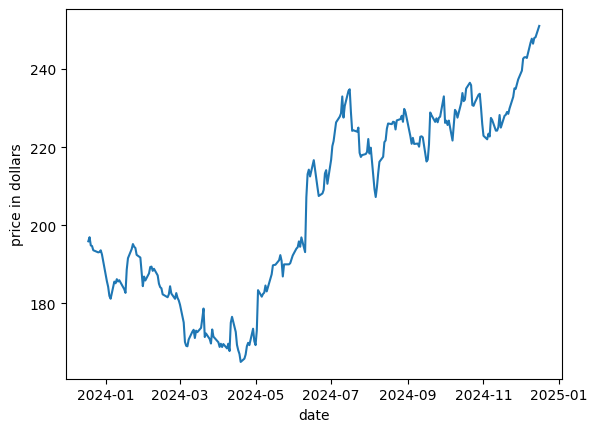

In [12]:
import yfinance as yf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta,date

today = str(date.today())
end = str(date.today() - timedelta(days=365))
print(end)
date= [date.today() - timedelta(days=i) for i in range(365)]
data =yf.download(tickers="AAPL", start=end, end=today, interval="1d")
close = data["Close"]
# date = data[""]
plt.plot(data["Close"])
plt.xlabel("date")
plt.ylabel("price in dollars")
plt.show()

The graph shows upward trend from 4 to 7th month, downward trend from 1 to 4th month sideways from 8 to 11th month and finally upward at yearend.

Question 2

In [70]:
import yfinance as yf
from datetime import date,timedelta
end = str(date.today())
start = str(date.today() - timedelta(days = 180))
c1 = yf.download(tickers="AAPL", start=start, end=end, interval="1d")
c2 = yf.download(tickers="MSFT", start=start, end=end, interval="1d")
c3 = yf.download(tickers="GOOGL", start=start, end=end, interval="1d")
invesment = 10000
D1,D2,D3,Total_Return = [],[],[],[]
# data["Daily Return"]  = (data["Adj Close"].pct_change())*100
# data.loc[0,"Daily Return"] = (data["Adj Close"].iloc[0] - data["Open"].iloc[0])/data["Open"].iloc[0]
# print(c1)
for i in range(len(data)):
    if i ==0:
        D1.append(float((c1["Adj Close"].iloc[i] - c1["Open"].iloc[i])/c1["Open"].iloc[i]))
        D2.append(float((c2["Adj Close"].iloc[i] - c2["Open"].iloc[i])/c2["Open"].iloc[i]))
        D3.append(float((c3["Adj Close"].iloc[i] - c3["Open"].iloc[i])/c3["Open"].iloc[i]))
        Total_Return.append((D1[i]+D2[i]+D3[i])/3)
    else:
        D1.append(float((c1["Adj Close"].iloc[i] - c1["Adj Close"].iloc[i-1])/c1["Open"].iloc[i]))
        D2.append(float((c2["Adj Close"].iloc[i] - c2["Adj Close"].iloc[i-1])/c2["Open"].iloc[i]))
        D3.append(float((c3["Adj Close"].iloc[i] - c3["Adj Close"].iloc[i-1])/c3["Open"].iloc[i]))
        Total_Return.append((D1[i]+D2[i]+D3[i])/3)
s = sum(D1)+sum(D2)+sum(D3)
print("Total Returns :",s*100,"%")
print("Current Value:",(s*invesment +invesment))
        
# for i in range(len(c1)):
#     print(c1[1][i])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/1454584446.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  D1.append(float((c1["Adj Close"].iloc[i] - c1["Open"].iloc[i])/c1["Open"].iloc[i]))
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/1454584446.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  D2.append(float((c2["Adj Close"].iloc[i] - c2["Open"].iloc[i])/c2["Open"].iloc[i]))
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/1454584446.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a

Total Returns : 28.955553587565074 %
Current Value: 12895.555358756508


Question 3: Portfolio Analysis Function (Chal-
lenging)

In [ ]:
def analyze_portfolio( tickers=["AAPL", "MSFT", 'GOOGL', "TSLA", "NVDA"], weights=[0.3, 0.2, 0.2, 0.2, 0.1], start_date="2023-01-01", end_date="2023-12-31"):
    data,returns = [],[[],[],[],[],[]]
    for i in range(5):
        data.append(yf.download(tickers=tickers[i], start=start_date, end=end_date, interval="1d"))
    Total_Return = []
    invesment = 10000
    # data["Daily Return"]  = (data["Adj Close"].pct_change())*100
    # data.loc[0,"Daily Return"] = (data["Adj Close"].iloc[0] - data["Open"].iloc[0])/data["Open"].iloc[0]
    for i in range(len(data[1])):
        if i ==0:
            Day = 0
            for j in range(5):
                returns[j].append(float((data[j]["Adj Close"].iloc[i] - data[j]["Open"].iloc[i])/data[j]["Open"].iloc[i]))
                Day += returns[j][i]*weights[j]
            Total_Return.append(Day)
        else:
            Day = 0
            for j in range(5):
                returns[j].append(float((data[j]["Adj Close"].iloc[i] - data[j]["Open"].iloc[i])/data[j]["Open"].iloc[i]))
                Day += returns[j][i]*weights[j]
            Total_Return.append(Day)
    shares = []
    for i in range(5):
        shares.append((invesment*weights[i])/data[i]["Open"].iloc[0])
    ret = []
    sum1 = 0
    for i in range(5):
        s = data[i]["Adj Close"].iloc[-1] * shares[i]
        ret.append(s)
        sum1 += float(s)
    print("End Value of each Stock:",ret,"\n Total Portfolio Value: ",sum1)
    return(sum1)
analyze_portfolio()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/828150115.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  returns[j].append(float((data[j]["Adj Close"].iloc[i] - data[j]["Open"].iloc[i])/data[j]["Open"].iloc[i]))
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/828150115.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  returns[j].append(float((data[j]["Adj Close"].iloc[i] - data[j]["Open"].iloc[i])/data[j]["Open

End Value of each Stock: [Ticker
AAPL    4411.836923
dtype: float64, Ticker
MSFT    3070.996368
dtype: float64, Ticker
GOOGL    3107.164767
dtype: float64, Ticker
TSLA    4194.817138
dtype: float64, Ticker
NVDA    3333.645253
dtype: float64] 
 Total Portfolio Value:  18118.460448449237


/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/828150115.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sum1 += float(s)


Bonus

In [ ]:
w1 = [0.3,0.2,0.1,0.3,0.1]
w2 = [0.3,0.2,0.3,0.1,0.1]
print(analyze_portfolio(weights=w1),analyze_portfolio(weights=w2))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/828150115.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  returns[j].append(float((data[j]["Adj Close"].iloc[i] - data[j]["Open"].iloc[i])/data[j]["Open"].iloc[i]))
/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/828150115.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  returns[j].append(float((data[j]["Adj Close"].iloc[i] - data[j]["Open"].iloc[i])/data[j]["Open

End Value of each Stock: [Ticker
AAPL    4411.836923
dtype: float64, Ticker
MSFT    3070.996368
dtype: float64, Ticker
GOOGL    1553.582384
dtype: float64, Ticker
TSLA    6292.225707
dtype: float64, Ticker
NVDA    3333.645253
dtype: float64] 
 Total Portfolio Value:  18662.286633762084
End Value of each Stock: [Ticker
AAPL    4411.836923
dtype: float64, Ticker
MSFT    3070.996368
dtype: float64, Ticker
GOOGL    4660.747151
dtype: float64, Ticker
TSLA    2097.408569
dtype: float64, Ticker
NVDA    3333.645253
dtype: float64] 
 Total Portfolio Value:  17574.634263136388
None None


/var/folders/b5/zkqjsg2157gcx_87943h6q5m0000gn/T/ipykernel_10105/828150115.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sum1 += float(s)
